# Assignment 2: Linear Models and Validation Metrics (40 marks total)
### Due: October 4 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (20 marks)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

### Step 1: Data Input (1 mark)

The data used for this task can be imported using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [53]:
# TO DO: Import spam dataset from yellowbrick library (0.5 marks)
from yellowbrick.datasets import load_spam

# TO DO: Print the size of X and y (0.5 marks)
X, y = load_spam()
print("Size of x: ", X.shape)
print("Size of y: ", y.shape)

print("Type of x: ", type(X))
print("Type of y: ", type(y))  


Size of x:  (4600, 57)
Size of y:  (4600,)
Type of x:  <class 'pandas.core.frame.DataFrame'>
Type of y:  <class 'pandas.core.series.Series'>


### Step 2: Data Processing (2 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [54]:
# TO DO: Check if there are any missing values and fill them in if necessary (1 mark)
print("Missing values in X: ", X.isnull().sum().sum())
print("Missing values in y: ", y.isnull().sum().sum())

Missing values in X:  0
Missing values in y:  0


For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **4%** of the data. Use `random_state=0`.

In [55]:
from sklearn.model_selection import train_test_split

# TO DO: Create X_small and y_small (1 mark)
X_small, _, y_small, _ = train_test_split(X, y, test_size=0.96, random_state=0)
X_small, y_small

(      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
 3116            0.00              14.28           0.00           0.0   
 2389            0.00               0.00           0.00           0.0   
 1447            0.30               0.20           0.30           0.0   
 199             0.00               0.54           0.54           0.0   
 3611            0.00               0.00           0.00           0.0   
 ...              ...                ...            ...           ...   
 1033            0.27               0.00           0.27           0.0   
 3264            0.49               0.00           0.00           0.0   
 1653            0.00               0.00           0.19           0.0   
 2607            0.00               0.00           0.00           0.0   
 2732            0.00               0.20           0.20           0.0   
 
       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
 3116           0.00            0.00        

### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets: 
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

In [56]:
from sklearn.linear_model import LogisticRegression

# instantiate model LogisticRegression(max_iter=2000)
model = LogisticRegression(max_iter=2000)
# implement model with X and y
model1 = model.fit(X, y)
# implement model with only first two columns of X and y
model2 = model.fit(X.iloc[:, :2], y)
# implement model with X_small and y_small
model3 = model.fit(X_small, y_small)

### Step 4: Validate Model 

Calculate the training and validation accuracy for the three different tests implemented in Step 3. For this case, you can use `cross_validate()` with `cv=5` and `scoring='accuracy'` to get the training and validation data for each of the three datasets and calculate the accuracy results.

In [57]:
# calculate the accuracy of the models

from sklearn.model_selection import cross_validate
cv_results1 = cross_validate(model1, X, y, cv=5, scoring='accuracy', return_train_score=True)
cv_results2 = cross_validate(model2, X.iloc[:, :2], y, cv=5, scoring='accuracy', return_train_score=True)
cv_results3 = cross_validate(model3, X_small, y_small, cv=5, scoring='accuracy', return_train_score=True)

# print the accuracy results
print("Accuracy of model1: ", cv_results1['test_score'].mean())
print("Accuracy of model2: ", cv_results2['test_score'].mean())
print("Accuracy of model3: ", cv_results3['test_score'].mean())
# had to edit print statement to print the mean of the test scores instead of the accuracies of the models
# also had to add paramater return_train_score=True to the cross_validate function

Accuracy of model1:  0.912608695652174
Accuracy of model2:  0.6097826086956522
Accuracy of model3:  0.8858858858858859


### Step 5.1: Visualize Results (3 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training accuracy and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [58]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
results = pd.DataFrame(columns=['Data size', 'Training Accuracy', 'Validation Accuracy'])
cv_results = [cv_results1, cv_results2, cv_results3]
X_sizes = [X.shape, X.iloc[:, :2].shape, X_small.shape]
for i in range(len(cv_results)):
    cv_result = cv_results[i]
    size = X_sizes[i]
    # add data size training accuracy and validation accuracy to the results dataframe
    results = results._append({'Data size': size, 'Training Accuracy': cv_result['train_score'].mean(), 'Validation Accuracy': cv_result['test_score'].mean()}, ignore_index=True)
print("Results: ", results)
# had to use _append instead of append because of the error: AttributeError: 'DataFrame' object has no attribute 'append'

Results:      Data size  Training Accuracy  Validation Accuracy
0  (4600, 57)           0.931087             0.912609
1   (4600, 2)           0.616250             0.609783
2   (184, 57)           0.952464             0.885886


### Step 5.2: Visualize Classification Errors (2 marks)

In this section, print the confusion matrix to investigate the number of false positives vs. false negatives. Use the full dataset for this analysis

In [59]:
# TO DO: Retrieve target vector and predicted values for validation set using full dataset (1 mark)
# retrieve target vector and predicted values for validation set using full dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_val)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

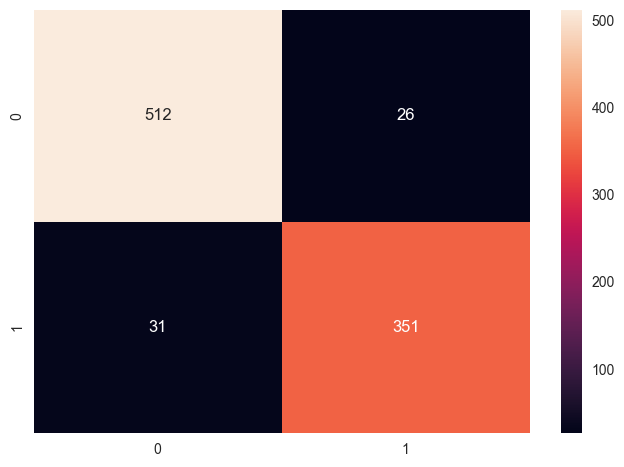

In [60]:
# TO DO: Print confusion matrix using a heatmap (1 mark)
# HINT: To remove scientific notation from a heatmap, set the parameter fmt='d'
# print confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

### Questions (8 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
1. Why do the training and validation accuracy behave this way when the amount of data is changed? Relate your answer to concepts discussed in class.
1. Do these results change based on the `random_state` selected for splitting the data into X_small and y_small? Why do you think it behaves this way?
1. In this case, what do a false positive and a false negative represent? Which one is worse?

*ANSWER HERE*

1. We see that the validation accuracy increases with the amount of data used. When using the whole dataset, we have a validation accuracy of approximately 0.91, compared to approximately 0.89 and 0.61 when using 4% of the dataset and just the first two columns, respectively. This is expected as we would expect to see an increase in validation accuracy with more data, as the model has more data to make predictions based on. The training accuracy, however does not necessarily increase with the amount of data used. We saw training accuracies of 0.93, 0.62, and 0.95 when using the whole dataset, the first two columns of the dataset, and 4% of the dataset, respectively.
2. For the accuracies derived from the first two columns of the dataset, we see evidence of underfitting which leads to similar training and validation scores that are quite low due to the little amount of data the model is trained on. For the accuracies derived from the whole dataset and 4% of the dataset, we see evidence of overfitting which is why the validation accuracy is worse than training accuracy, which is particularly relevant for the model trained on 4% of the dataset. The large amount of data being used to train the model leads to high variance in those scores due to the high bias.
3. These results will indeed change. According to the `scikit-learn` documentation, the `random_state` parameter controls the shuffling of the data before applying the split. This means that different subsets of the data are used depending on the value of this parameter, which will lead to differences in model predictions after training it on different subsets.
4. In this case, a false positive implies an email that is a good email being marked as spam, and a false negative implies an email that is spam being marked as a good email. For this scenario, I believe a false positive is worse since it could lead to crucial emails potentially being filtered out and marked as spam without the receiver ever having knowledge of it, whereas human discretion can be used to discern spam emails that do potentially make it through the detector in the case of false negatives.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

I sourced my code from the `scikit-learn` documentation [here](https://scikit-learn.org/stable/), the code and explanations in Dr. Dawson's `Model Selection Example.ipynb` file from D2L, and GitHub Copilot for code completion, which is a generative AI tool. GitHub Copilot did not need any explicit prompting on my end. It would either have code suggestions inline based on the question prompt, or finish the line of code as I started typing it. These were the instances where I had to modify the code: 
- In Step 4, I had to edit the print statement to print the mean of the test scores instead of the accuracies for each of the models, which is what Copilot initially suggested. I also had to add the paramater `return_train_score=True` to the `cross_validate` function call, which Copilot missed in its initial suggestion.
- In Step 5.1, Copilot suggested using `results.append`, but this threw an AttributeError so I changed it to `results._append`.
My major challenges arose from sifting through the examples from lecture and lab to find what was most applicable to this assignment. I found that simply opening the files and using CMD-F to search for the relevant terms worked well, and I was then able to apply this to the problems here. 

## Part 2: Regression (18 marks)

For this section, we will be using the auto-mpg dataset from Lab 2. You will need to repeat the steps from Part 1 for this analysis.

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded from UCI website: https://archive.ics.uci.edu/ml/datasets/Auto%2BMPG 

Load the auto-mpg dataset and inspect the first few rows

In [61]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
widths = [7, 4, 10, 10, 11, 7, 4, 4, 30]
df = pd.read_fwf(url, widths=widths, header=None, na_values=['?'])

print(df.head())

      0  1      2      3       4     5   6  7                            8
0  18.0  8  307.0  130.0  3504.0  12.0  70  1  "chevrolet chevelle malibu"
1  15.0  8  350.0  165.0  3693.0  11.5  70  1          "buick skylark 320"
2  18.0  8  318.0  150.0  3436.0  11.0  70  1         "plymouth satellite"
3  16.0  8  304.0  150.0  3433.0  12.0  70  1              "amc rebel sst"
4  17.0  8  302.0  140.0  3449.0  10.5  70  1                "ford torino"


### Step 2: Data Processing (2.5 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [62]:
# TO DO: Check if there are any missing values and fill them in if necessary (1 mark)
print("Missing values in df: ", df.isnull().sum().sum())
df.fillna(0, inplace=True)

Missing values in df:  6


Remove any columns that do not have numerical data

In [63]:
# TO DO: Remove non-numeric data (0.5 marks)
df = df.select_dtypes(include=[np.number])

Split the auto-mpg data into the feature matrix and target vector. Inspect the first few columns of the feature matrix to make sure it split properly

In [64]:
# TO DO: Create feature matrix and target vector (1 mark) 
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X, y)

        0  1      2      3       4     5   6
0    18.0  8  307.0  130.0  3504.0  12.0  70
1    15.0  8  350.0  165.0  3693.0  11.5  70
2    18.0  8  318.0  150.0  3436.0  11.0  70
3    16.0  8  304.0  150.0  3433.0  12.0  70
4    17.0  8  302.0  140.0  3449.0  10.5  70
..    ... ..    ...    ...     ...   ...  ..
393  27.0  4  140.0   86.0  2790.0  15.6  82
394  44.0  4   97.0   52.0  2130.0  24.6  82
395  32.0  4  135.0   84.0  2295.0  11.6  82
396  28.0  4  120.0   79.0  2625.0  18.6  82
397  31.0  4  119.0   82.0  2720.0  19.4  82

[398 rows x 7 columns] 0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: 7, Length: 398, dtype: int64


### Step 3: Implement and Validate Machine Learning Model (2.5 marks)

1. Import any required libraries
1. Split the data into training and testing sets (testing data should be 10% of the dataset)
1. Instantiate model `LinearRegression()`
1. Train and validate the machine learning model using the training set (using `cross_validate()` with `cv=5` and `scoring='r2'`)
1. Print the training and validation accuracy 

In [65]:
# TO DO: ADD YOUR CODE HERE
# Note: for any random state parameters, you can use random_state = 0
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring='r2', return_train_score=True)
print("R2 results: ", cv_results['test_score'].mean())


R2 results:  0.46506393640156124


### Step 4: Test Model (1 mark)

Calculate the testing accuracy using the R^2 score

In [66]:
# TO DO: ADD YOUR CODE HERE
y_pred = model.predict(X_val)
from sklearn.metrics import r2_score
r2 = r2_score(y_val, y_pred)
print("R2 score: ", r2)

R2 score:  0.360946784567832


### Step 5: Visualize Results (1.5 marks)

1. Plot the relationship between each of the features and the target vector using `pairplot`
1. Plot the correlation matrix
1. Print the coefficients for each feature and the intercept

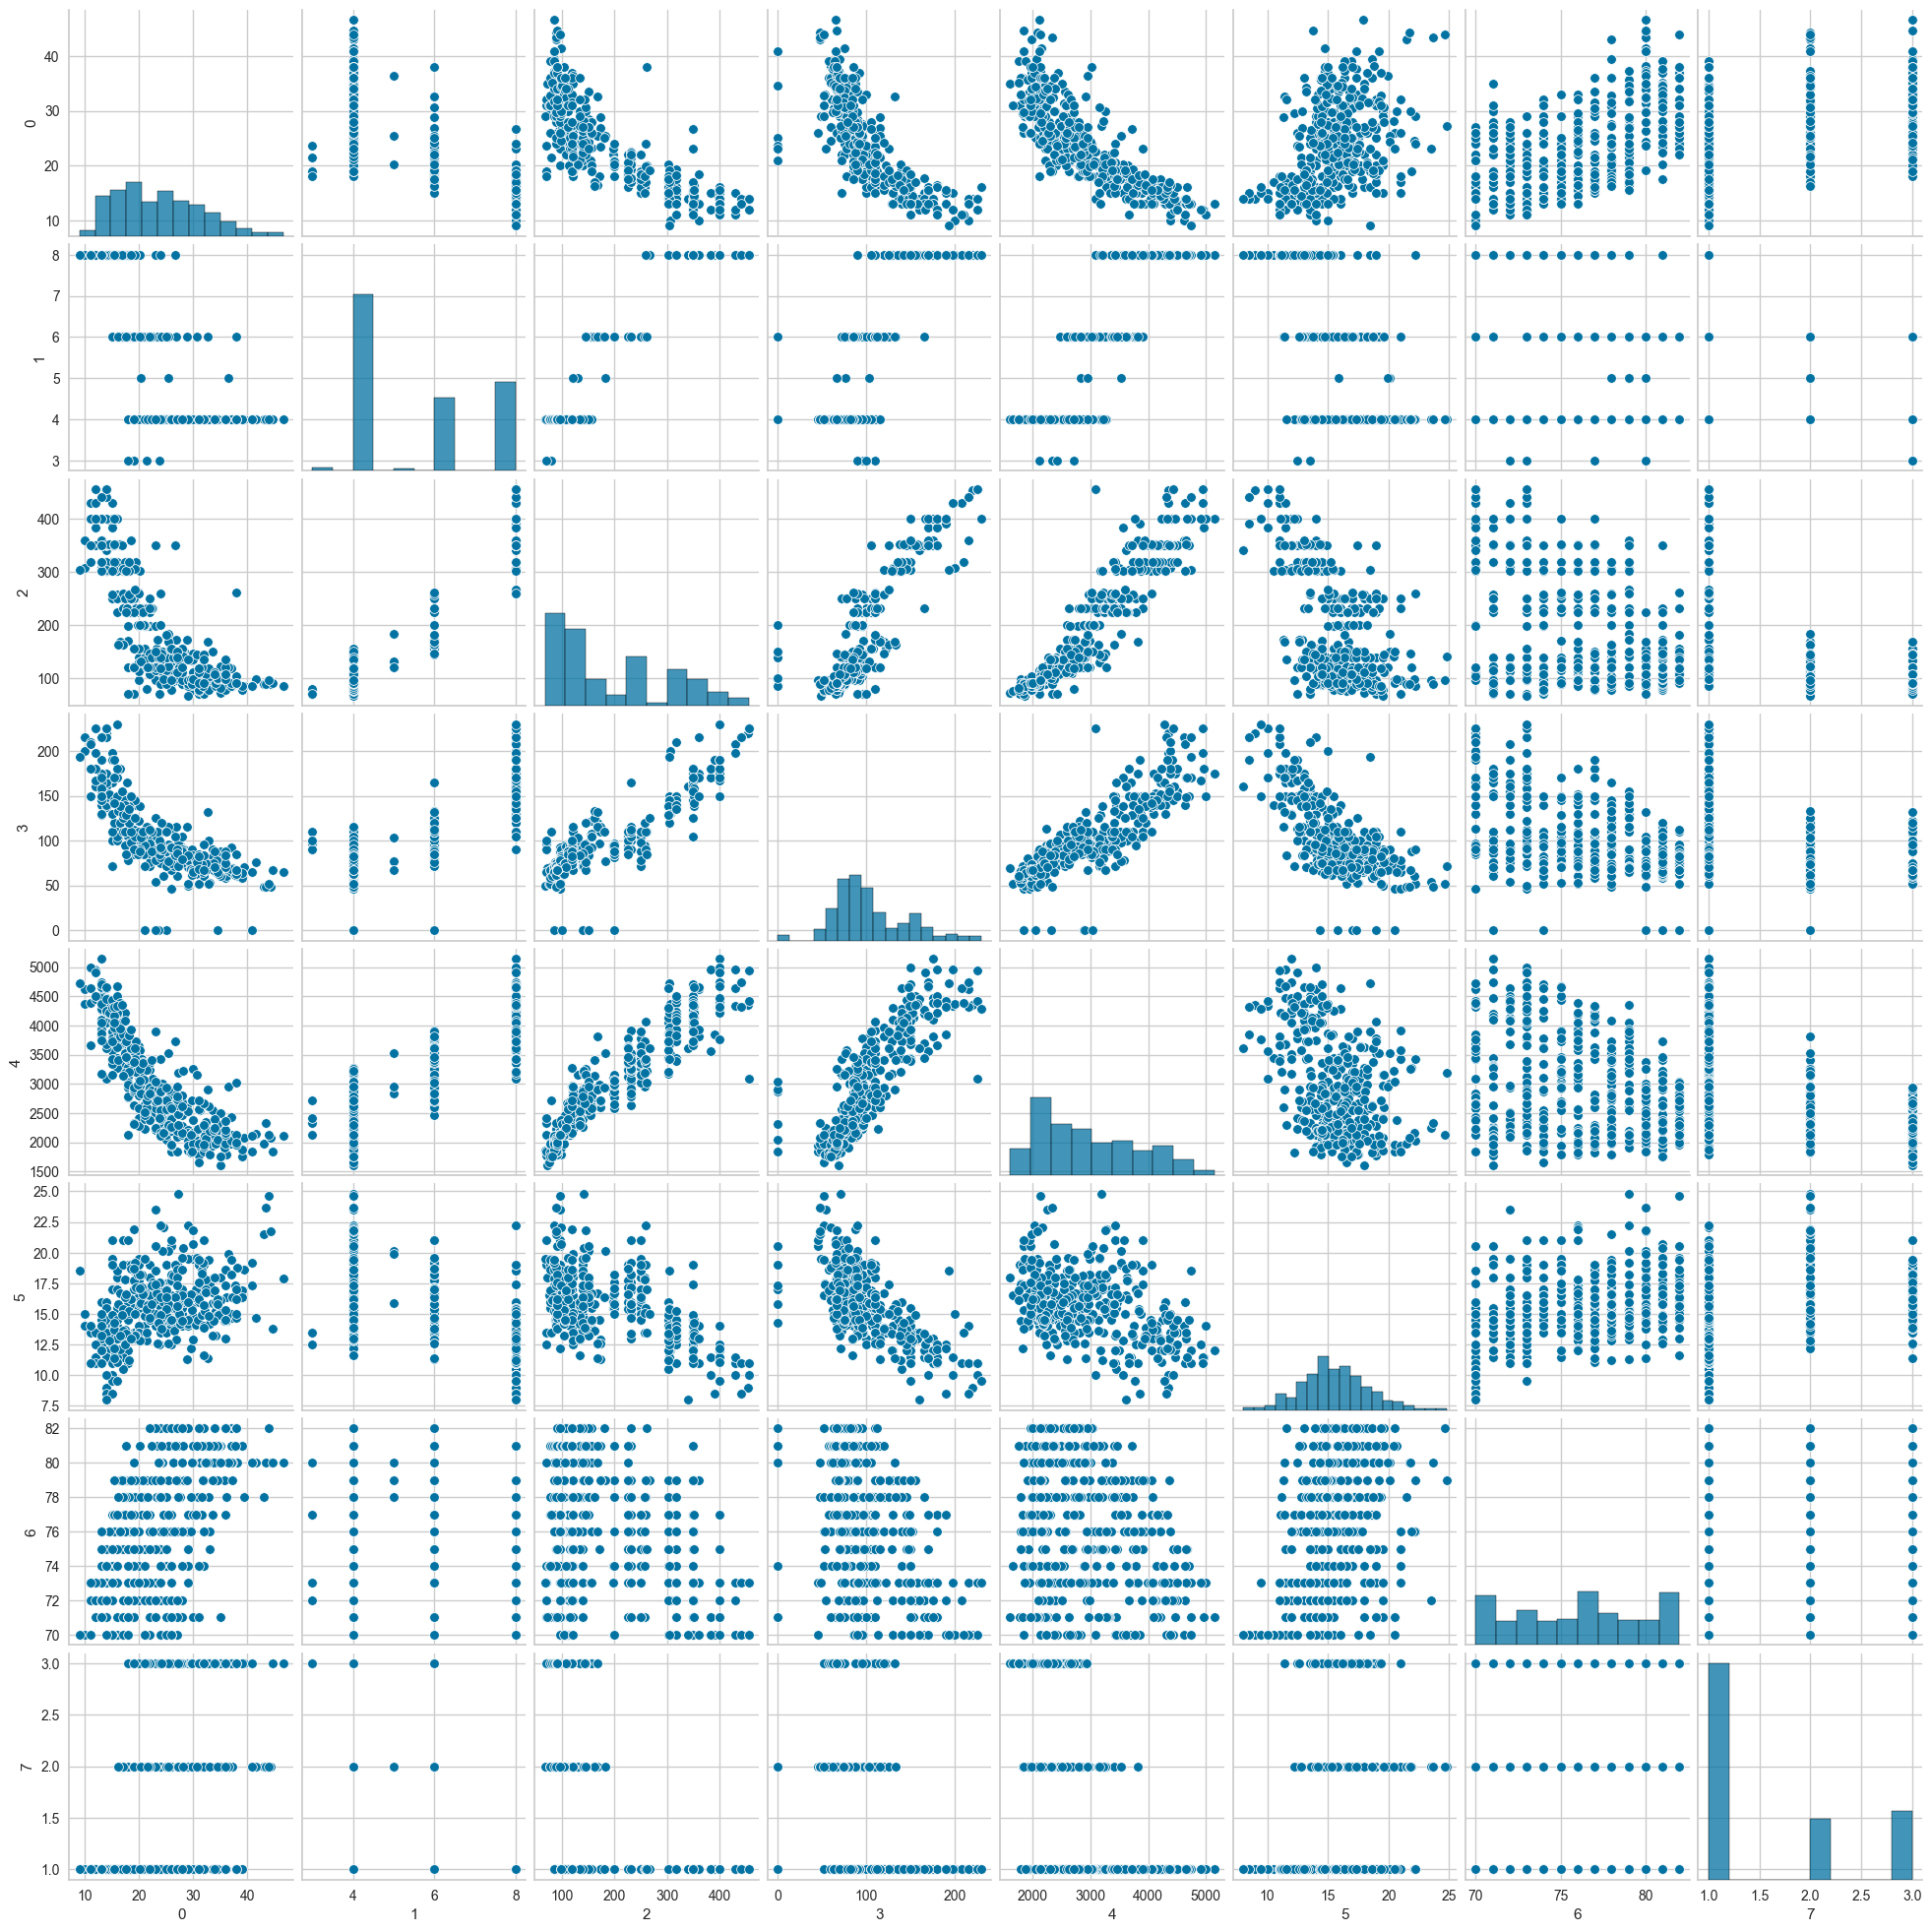

In [67]:
# TO DO: Plot pairplot (0.5 marks)
# plot relationship between features and target vector using pairplot
sns.pairplot(df)
plt.show()

<Axes: >

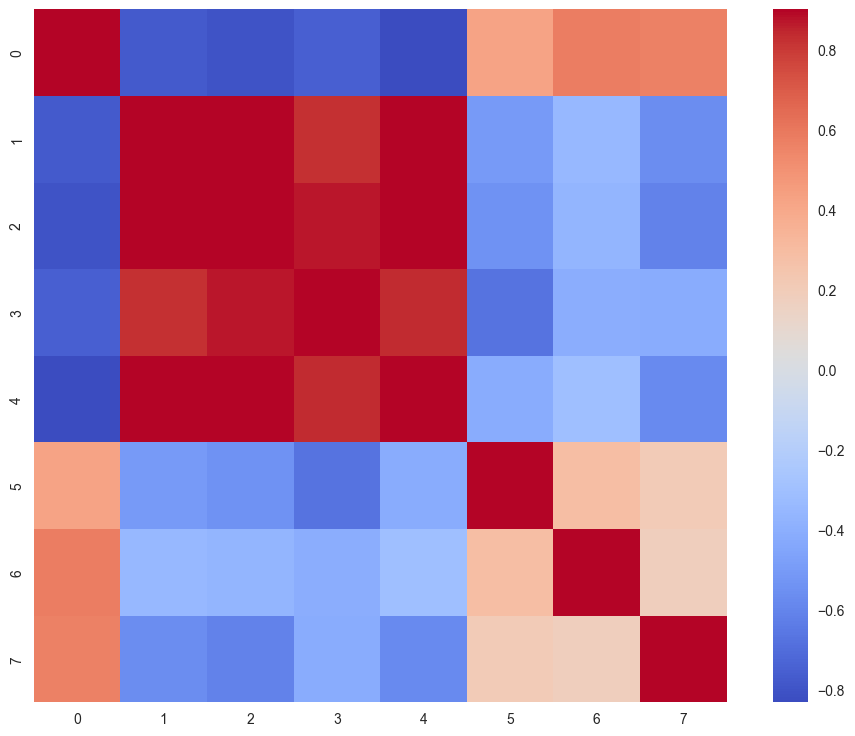

In [68]:
# TO DO: Plot correlation matrix (0.5 marks)
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, cmap='coolwarm')

In [69]:
# TO DO: Print model coefficients and intercept (0.5 marks)
# print model coefficients and intercept
print("Model coefficients: ", model.coef_)
print("Model intercept: ", model.intercept_)

Model coefficients:  [ 4.43935724e-02  1.10559266e-01 -8.39667886e-03  9.67817229e-03
  1.05816095e-04 -9.75170441e-03 -2.68618833e-02]
Model intercept:  2.4396077385251367


### Questions (6 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?
1. Do the coefficients for each of the features make sense when compared to the `pairplot` and the correlation matrix? Why or why not?
1. If you repeat this analysis with ridge regression, do the results change significantly? Why do you think is the cause of these (changed or unchanged) results?

*ANSWER HERE*
1. We did not see good results here. A low R2 score as seen in Step 4 implies a potential need for something other than a linear regression. This is likely because the relationships in this data set do not follow linear relationships.
2. The coefficients do indeed make sense because we see very smal coefficients which translates to low correlation as seen in the correlation matrix. 
3. We would expect to see improved results when using ridge regression since there are a large number of features in this dataset, which ridge regression is designed to handle. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

I sourced my code from the `scikit-learn` documentation [here](https://scikit-learn.org/stable/), the code and explanations in Dr. Dawson's `Linear Models Practice_soln.ipynb` file from D2L, and GitHub Copilot for code completion, which is a generative AI tool. GitHub Copilot did not need any explicit prompting on my end. It would either have code suggestions inline based on the question prompt, or finish the line of code as I started typing it. Here is where I modified the code:
- In Step 5, Copilot initially suggested the call to `pairplot` include the paramters `x_vars=X.columns` and `y_vars=y.columns`. This did not give the results I expected so I modified the line to just be `sns.pairplot(df)`
- In Step 5, Copilot suggested the correlation matrix be plotted by simply calling `sns.heatmap(df.corr())`. After reviewing Dr. Dawson's `Linear Models Practice_soln.ipynb` file from D2L, I modified this to more closely align with what was seen there.

I also referred to [this Stack OverFlow post](https://stackoverflow.com/questions/13244095/whats-the-easiest-way-of-getting-this-data-into-a-pandas-dataframe) for help with importing the dataset, as the instructions on the linked website would not work on my environment. This was my main challenge with the assignment.

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I liked the chance to combine the ideas discussed in lab and lecture and work with some interesting datasets. I gained a deeper understanding about Pandas and scikit-learn. One thing I found particularly challenging was importing the `ucimlrepo` package, as for whatever reason it would not work in my environment when I followed the default instructions on the website. I overcame this by following an alternate solution I found on Stack OverFlow, as mentioned in my process above.